# Assignment 5: Maps, decision trees, and k-nearest neighbors

1. This question uses the restaurant inspection data from Assignment 1 and is based on part of Lab 14. Write a piece of code to make a map centered at Yankee stadium (40.7128° N, 74.0060° W) with a marker for each restaurant in the Bronx with a health inspection score of 4 or less.  The name of the restaurant should appear when you hover over the marker.  

The remaining questions use the diamonds dataset from the midterm.  It is from [Kaggle](https://www.kaggle.com/shivam2503/diamonds) and can be downloaded directly [here](http://comet.lehman.cuny.edu/owen/teaching/mat328/diamonds.csv).  You should use the parameter `index_col = 0` with `read_csv()` when loading the diamond dataset to tell Pandas that the first column is the index (name of the rows).
    
2. Using the diamonds dataset:

    a. Turn the cut, color, and clarity columns into dummy variables.
    
    b. Create a variable for all features/input variables (all columns except price) and a variable for the output (the price column).
    
    c. Split the data into training (80%) and testing (20%) datasets.
    
    d. Train a decision tree with maximum depth 2 on your training data to predict the price, and use it to predict the price of the testing data.
    
    e. Compute the mean squared error of the predictions from (2d).
    
    f. Create an image of your decision tree and include it in your zip file.  Which features are used to predict the price in your decision tree?
    
    g. Try at least 2 other maximum depth values (either by hand or using a loop).  State which values you tried, and which depth gives the best accuracy.

3. Using the diamonds training and testing data from 2a-c:

    a. Use the training data to train a k-nearest neighbors regressor with k = 3 to predict the price of diamonds for the test data.
    
    b. Compute the mean squared error of the predictions from (3a).  How does this mean squared error compare to the best mean squared error you found in 2f?
    
    c. Normalize all columns in the training and testing data to be between 0 and 1.
    
    d. Use the normalized training data to train a k-nearest neighbors regressor with k = 3 to predict the price of diamonds.  Test your regressor on the scaled testing data and compute the mean squared error.  How does this mean squared error compare to the one your computed in 3b?  Do you recommend scaling the input variables?
    
    e. Try at least 2 other values for k (either by hand or using a loop), by making predictions for the scaled test data and computing the mean squared error.  State which values you tried, and which k gives the best mean squared error.
    
    f.  Based on your results from questions 2 and 3, what model (decision tree or knn) and parameter do you recommend for predicting price from this kind of diamond data?
    
4. Starting with the original version of the diamonds dataset:

    a. Turn the color and clarity columns into dummy variables.
    
    b. Create a variable for all features/input variables (all columns except cut) and a variable for the output (the cut column).
    
    c. Split the data into training (80%) and testing (20%) datasets.
    
    d. Train a decision tree classifier (your choice of maximum depth) on your training data to predict the cut, and use it to predict the cuts of the testing data.
    
    e. Compute the confusion matrix of the predictions from (4d), and from the information in it compute the accuracy of your predictions.

5. Using the diamonds training and testing data from 4a-c:

    a. Scale your input columns in your training and testing data.
    
    b. Use the scaled training data to train a k-nearest neighbors classifier (your choice of k) to predict the cut of diamonds for the scaled test data.
    
    d. Compute the confusion matrix and accuracy of your predictions in (5b). How does the accuracy compare to the accuracy of the decision tree classifier?  Which classifier and which parameter would you chose to make predictions of the cut of diamonds from this type of data? 

In [1]:
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)

This question uses the restaurant inspection data from Assignment 1 and is based on part of Lab 14. Write a piece of code to make a map centered at Yankee stadium (40.7128° N, 74.0060° W) with a marker for each restaurant in the Bronx with a health inspection score of 4 or less. The name of the restaurant should appear when you hover over the marker.

In [2]:
inspection = pd.read_csv("restaurant_inspection.csv")
inspection.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,50074557,FISH VILLAGE,Queens,2007,127TH ST,11356.0,6468307299,Chinese,01/02/2019,Violations were cited in the following area(s).,08C,Pesticide use not in accordance with label or ...,N,22.0,NaN,NaN,08/30/2019,Cycle Inspection / Initial Inspection,40.781449,-73.841413,407.0,19.0,91900.0,4099328.0,4.041720e+09,QN23
1,50086382,IL POSTO,Brooklyn,7409,AVENUE U,11234.0,7182414317,Italian,01/02/2019,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,N,29.0,NaN,NaN,08/30/2019,Pre-permit (Operational) / Initial Inspection,40.621321,-73.905154,318.0,46.0,69602.0,3237484.0,3.084150e+09,BK45
2,41258823,LITTLE CAESARS,Bronx,1888,WESTCHESTER AVENUE,10472.0,3476571722,Pizza,01/02/2019,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,N,4.0,A,01/02/2019,08/30/2019,Cycle Inspection / Re-inspection,40.832928,-73.861964,209.0,18.0,7200.0,NaN,2.000000e+00,BX55
3,50002053,THE LOCAL,Queens,13-02,44TH AVENUE,11101.0,3477385251,American,01/02/2019,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Y,7.0,A,01/02/2019,08/30/2019,Cycle Inspection / Initial Inspection,40.749644,-73.947487,402.0,26.0,1900.0,4005221.0,4.004460e+09,QN31
4,50055374,FLORA BAR,Manhattan,945,MADISON AVE,10021.0,6317038780,American,01/02/2019,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Y,11.0,A,01/02/2019,08/30/2019,Cycle Inspection / Re-inspection,40.773450,-73.964199,108.0,4.0,13000.0,1041666.0,1.013890e+09,MN40


In [3]:
m = folium.Map(location=[40.7128, -74.0060])

In [4]:
four_or_less_filter = inspection["SCORE"] <= 4.0
four_or_less = inspection[four_or_less_filter]

In [5]:
inspection.shape

(110364, 26)

In [6]:
four_or_less.shape

(3623, 26)

In [7]:
four_or_less = four_or_less.dropna()

In [8]:
for i in range(four_or_less.shape[0]):
    row = four_or_less.iloc[i]
    folium.Marker([row["Latitude"], row["Longitude"]],
                 tooltip = row["DBA"]
                 ).add_to(m)
m

Using the diamonds dataset:

    a. Turn the cut, color, and clarity columns into dummy variables.
    
    b. Create a variable for all features/input variables (all columns except price) and a variable for the output (the price column).
    
    c. Split the data into training (80%) and testing (20%) datasets.
    
    d. Train a decision tree with maximum depth 2 on your training data to predict the price, and use it to predict the price of the testing data.
    
    e. Compute the mean squared error of the predictions from (2d).
    
    f. Create an image of your decision tree and include it in your zip file.  Which features are used to predict the price in your decision tree?
    
    g. Try at least 2 other maximum depth values (either by hand or using a loop).  State which values you tried, and which depth gives the best accuracy.

In [9]:
diamonds = pd.read_csv("diamonds.csv")
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [10]:
diamond_dummies = pd.get_dummies(diamonds, columns = ["cut", "color", "clarity"])
diamond_dummies.head()

,Unnamed: 0,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,3,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,4,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,5,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [11]:
diamond_dummies.shape

(53940, 28)

In [14]:
X = diamond_dummies.iloc[:, [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]]
X.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [16]:
y = diamond_dummies["price"]
y.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import sklearn.metrics as met
from sklearn.metrics import confusion_matrix
from sklearn import tree
import graphviz
from graphviz import Source


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [25]:
reg = tree.DecisionTreeRegressor(max_depth = 2)
reg = reg.fit(X_train, y_train)

In [26]:
predictions = reg.predict(X_test)

In [29]:
import math
mse = ((y_test - predictions)**2).mean()
rmse = math.sqrt(mse)

In [30]:
print("MSE: " + str(mse))
print("RMSE: " + str(rmse))

MSE: 2766715.536284216
RMSE: 1663.344683547044


[Text(167.4, 181.2, 'X[0] <= 0.995\nentropy = 15789770.299\nsamples = 43152\nvalue = 3923.503'),
 Text(83.7, 108.72, 'X[4] <= 5.535\nentropy = 1252342.049\nsamples = 27885\nvalue = 1631.752'),
 Text(41.85, 36.23999999999998, 'entropy = 272935.279\nsamples = 19978\nvalue = 1057.925'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 792921.381\nsamples = 7907\nvalue = 3081.597'),
 Text(251.10000000000002, 108.72, 'X[4] <= 7.195\nentropy = 15227883.166\nsamples = 15267\nvalue = 8109.359'),
 Text(209.25, 36.23999999999998, 'entropy = 4647274.937\nsamples = 10341\nvalue = 6123.174'),
 Text(292.95, 36.23999999999998, 'entropy = 11772899.846\nsamples = 4926\nvalue = 12278.898')]

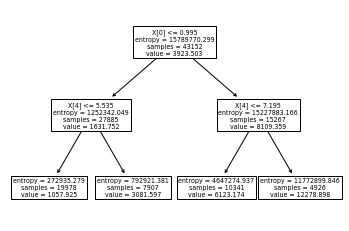

In [31]:
tree.plot_tree(reg)

In [32]:
dot_data = tree.export_graphviz(reg, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("diamond.dot")

ExecutableNotFound: failed to execute ['dot', '-Tpdf', '-O', 'diamond.dot'], make sure the Graphviz executables are on your systems' PATH

In [35]:
with open ("diamond.dot", "r") as fin:
    with open("diamond_fixed.dot","w") as fout:
        for line in fin.readlines():
            line = line.replace("X[0]","carat")
            line = line.replace("X[4]","y")         
            fout.write(line)

__Carat and the height of the diamonds (y) were used by the model to predict price__

In [36]:
reg2 = tree.DecisionTreeRegressor(max_depth = 3)
reg2 = reg2.fit(X_train, y_train)

In [40]:
reg3 = tree.DecisionTreeRegressor(max_depth = 4)
reg3 = reg3.fit(X_train, y_train)

In [38]:
predictions2 = reg2.predict(X_test)
mse2 = ((y_test - predictions2)**2).mean()
rmse2 = math.sqrt(mse2)

In [41]:
predictions3 = reg3.predict(X_test)
mse3 = ((y_test - predictions3)**2).mean()
rmse3 = math.sqrt(mse3)

In [43]:
print("MSE (Depth of 2): " + str(mse))
print("RMSE (Depth of 2): " + str(rmse))
print("MSE (Depth of 3): " + str(mse2))
print("RMSE (Depth of 3): " + str(rmse2))
print("MSE (Depth of 4): " + str(mse3))
print("RMSE (Depth of 4): " + str(rmse3))

MSE (Depth of 2): 2766715.536284216
RMSE (Depth of 2): 1663.344683547044
MSE (Depth of 3): 2766715.536284216
RMSE (Depth of 3): 1663.344683547044
MSE (Depth of 4): 1691207.8901732292
RMSE (Depth of 4): 1300.464490162353


__Decision trees of max_depths of 2, 3, and 4 were each created, trained, and tested. it appears that the model with the max_depth of 4 was the most accurate.__